In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import ast

2023-04-01 09:55:53.545092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
df_3 = pd.read_csv('df_3.csv')
df_4 = pd.read_csv('df_4.csv')
df_5 = pd.read_csv('df_5.csv')
df_6 = pd.read_csv('df_6.csv')
df_7 = pd.read_csv('df_7.csv')
LOL_data = pd.concat([df_3, df_4,df_5,df_6,df_7])
LOL_data  = LOL_data.reset_index(drop=True)
LOL_data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
LOL_data.head(15)

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,teamPosition,tier,top_champs_overall,wins,losses,winPct,veteran,freshBlood,hotStreak,win
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,TOP,GRANDMASTER,"['JarvanIV', 'LeeSin', 'Renekton']",131.0,118.0,0.526104,False,False,False,False
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,JUNGLE,GRANDMASTER,"['JarvanIV', 'Elise', 'Camille']",377.0,360.0,0.511533,False,True,False,False
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,MIDDLE,GRANDMASTER,"['Cassiopeia', 'Yasuo', 'Zed']",70.0,55.0,0.560000,False,True,True,False
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,BOTTOM,GRANDMASTER,"['Shaco', 'Khazix', 'Ekko']",176.0,167.0,0.513120,False,True,False,False
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,UTILITY,DIAMOND,"['Zilean', 'Evelynn', 'Soraka']",97.0,85.0,0.532967,False,True,False,False
5,0,KSante,Sylas,Yasuo,Jhin,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,TOP,DIAMOND,"['Darius', 'Aatrox', 'Mordekaiser']",8.0,4.0,0.666667,False,False,False,False
6,1,Sylas,KSante,Yasuo,Jhin,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,JUNGLE,MASTER,"['LeeSin', 'Graves', 'Gangplank']",49.0,38.0,0.563218,False,False,False,False
7,2,Yasuo,KSante,Sylas,Jhin,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,MIDDLE,CHALLENGER,"['Irelia', 'Yasuo', 'Akali']",108.0,90.0,0.545455,False,False,False,False
8,3,Jhin,KSante,Sylas,Yasuo,Blitzcrank,Quinn,Shaco,Cassiopeia,Kaisa,...,BOTTOM,GRANDMASTER,"['Sylas', 'Kindred', 'Graves']",142.0,133.0,0.516364,False,False,False,False
9,4,Blitzcrank,KSante,Sylas,Yasuo,Jhin,Quinn,Shaco,Cassiopeia,Kaisa,...,UTILITY,GRANDMASTER,"['Darius', 'Renekton', 'Blitzcrank']",131.0,118.0,0.526104,True,False,False,False


In [10]:
LOL_data.head(10).iloc[:, -10:]

,teamPosition,tier,top_champs_overall,wins,losses,winPct,veteran,freshBlood,hotStreak,win
0,TOP,GRANDMASTER,"['JarvanIV', 'LeeSin', 'Renekton']",131.0,118.0,0.526104,False,False,False,False
1,JUNGLE,GRANDMASTER,"['JarvanIV', 'Elise', 'Camille']",377.0,360.0,0.511533,False,True,False,False
2,MIDDLE,GRANDMASTER,"['Cassiopeia', 'Yasuo', 'Zed']",70.0,55.0,0.560000,False,True,True,False
3,BOTTOM,GRANDMASTER,"['Shaco', 'Khazix', 'Ekko']",176.0,167.0,0.513120,False,True,False,False
4,UTILITY,DIAMOND,"['Zilean', 'Evelynn', 'Soraka']",97.0,85.0,0.532967,False,True,False,False
5,TOP,DIAMOND,"['Darius', 'Aatrox', 'Mordekaiser']",8.0,4.0,0.666667,False,False,False,False
6,JUNGLE,MASTER,"['LeeSin', 'Graves', 'Gangplank']",49.0,38.0,0.563218,False,False,False,False
7,MIDDLE,CHALLENGER,"['Irelia', 'Yasuo', 'Akali']",108.0,90.0,0.545455,False,False,False,False
8,BOTTOM,GRANDMASTER,"['Sylas', 'Kindred', 'Graves']",142.0,133.0,0.516364,False,False,False,False
9,UTILITY,GRANDMASTER,"['Darius', 'Renekton', 'Blitzcrank']",131.0,118.0,0.526104,True,False,False,False


In [11]:
LOL_data.shape

(27470, 21)

In [12]:
## keep first 5 rows for every 10 rows, where teammates are grouped in the first 5 columns 
# LOL_data = LOL_data[LOL_data['Index'] % 10 < 5]
# LOL_data.reset_index(drop=True, inplace=True)

In [13]:
LOL_data.shape

(27470, 21)

In [14]:
# Define a function to check the length of the top_champs_overall column
def check_length(row):
    return len(ast.literal_eval(row)) == 3

# Use apply() with a lambda function to filter rows based on the check_length function
LOL_data = LOL_data[LOL_data['top_champs_overall'].apply(lambda x: check_length(x))]

In [15]:
LOL_data.shape

(21090, 21)

#If each match involves 10 players and 162 champions, then your player input array would have shape (801, 10, num_player_features) and your champion input array would have shape (801, 162, num_champion_features).

In [16]:
# filter the DataFrame to get rid of the rows with NaN values
LOL_data = LOL_data.dropna(how='any')

# reset the index of the DataFrame
LOL_data = LOL_data.reset_index(drop=True)


In [17]:
LOL_data.shape

(17515, 21)

In [18]:
LOL_data_copy = LOL_data.copy()

## Encode champions

In [19]:
# split top 3 champions column into separate columns
participants=[]
for row in LOL_data["top_champs_overall"]:
    participants_row={}
    ##the original columnn is of string type so I need to unstring it
    champ1, champ2, champ3 = ast.literal_eval(row)
    participants_row['topchamp1'] = champ1
    participants_row['topchamp2'] = champ2
    participants_row['topchamp3'] = champ3
    participants.append(participants_row)


# participants = [
#     {
#         'topchamp1': champ1,
#         'topchamp2': champ2,
#         'topchamp3': champ3
#     }
#     for champ1, champ2, champ3 in map(ast.literal_eval, LOL_data["top_champs_overall"])
# ]

# Create a new data frame with the participants list
participants_df = pd.DataFrame(participants)

# Concatenate the original data frame with the participants data frame
LOL_data = pd.concat([LOL_data, participants_df], axis=1)


### old part

In [20]:

champion_data = pd.read_csv('riot_champion.csv')
champion_data.head()

def add_newchamp(newchamps,championID):
  count = 0
  for champ in newchamps:
   if champ not in championID:
      championID.append(champ)
      count+=1
  championID.sort()
  ##returns number of new champions added
  return (str(count) + " champions have been added")

def create_dict(championID):
  ##creates a dictionary of champions and their corresponding ID
  return dict(zip(list(range(len(championID))),championID))

## adds new champs to our current list
newchamps = ['Aphelios','Lillia','Yone','Samira','Seraphine',
             'Sett','Rell','Akshan','Gwen','Vex','Viego',"Belveth","KSante",'Nilah','Zeri',"Renata","Milio"]
championID = pd.Series.tolist(champion_data.id)
add_newchamp(newchamps,championID)

'15 champions have been added'

In [21]:
## combine the list and index to a champion dictionary
champ_dict = create_dict(championID)
champ_dict.items()

dict_items([(0, 'Aatrox'), (1, 'Ahri'), (2, 'Akali'), (3, 'Akshan'), (4, 'Alistar'), (5, 'Amumu'), (6, 'Anivia'), (7, 'Annie'), (8, 'Aphelios'), (9, 'Ashe'), (10, 'AurelionSol'), (11, 'Azir'), (12, 'Bard'), (13, 'Belveth'), (14, 'Blitzcrank'), (15, 'Brand'), (16, 'Braum'), (17, 'Caitlyn'), (18, 'Camille'), (19, 'Cassiopeia'), (20, 'Chogath'), (21, 'Corki'), (22, 'Darius'), (23, 'Diana'), (24, 'DrMundo'), (25, 'Draven'), (26, 'Ekko'), (27, 'Elise'), (28, 'Evelynn'), (29, 'Ezreal'), (30, 'Fiddlesticks'), (31, 'Fiora'), (32, 'Fizz'), (33, 'Galio'), (34, 'Gangplank'), (35, 'Garen'), (36, 'Gnar'), (37, 'Gragas'), (38, 'Graves'), (39, 'Gwen'), (40, 'Hecarim'), (41, 'Heimerdinger'), (42, 'Illaoi'), (43, 'Irelia'), (44, 'Ivern'), (45, 'Janna'), (46, 'JarvanIV'), (47, 'Jax'), (48, 'Jayce'), (49, 'Jhin'), (50, 'Jinx'), (51, 'KSante'), (52, 'Kaisa'), (53, 'Kalista'), (54, 'Karma'), (55, 'Karthus'), (56, 'Kassadin'), (57, 'Katarina'), (58, 'Kayle'), (59, 'Kayn'), (60, 'Kennen'), (61, 'Khazix'), (6

In [22]:

def get_ID(champion): 
    if champion in champ_dict.values():
        for ID in champ_dict.items():
            if ID[1] == champion:
                return ID[0]
    if champion not in champ_dict.values():
        print('cannot find ' + str(champion))
                
# LOL_data["champion_encoded"] = LOL_data["champion"].apply(get_ID)
# LOL_data["champion1_encoded"] = LOL_data["champion1"].apply(get_ID)
# LOL_data["champion2_encoded"] = LOL_data["champion2"].apply(get_ID)
# LOL_data["champion3_encoded"] = LOL_data["champion3"].apply(get_ID)
# LOL_data["champion4_encoded"] = LOL_data["champion4"].apply(get_ID)
# LOL_data["champion5_encoded"] = LOL_data["champion5"].apply(get_ID)
# LOL_data["champion6_encoded"] = LOL_data["champion6"].apply(get_ID)
# LOL_data["champion7_encoded"] = LOL_data["champion7"].apply(get_ID)
# LOL_data["champion8_encoded"] = LOL_data["champion8"].apply(get_ID)
# LOL_data["champion9_encoded"] = LOL_data["champion9"].apply(get_ID)

columns_to_encode = ["champion", "champion1", "champion2", "champion3", "champion4","champion5", "champion6","champion7", "champion8","champion9",'topchamp1','topchamp2','topchamp3']
for col in columns_to_encode:
    LOL_data[f"{col}_encoded"] = LOL_data[col].apply(get_ID)



LOL_data.columns

Index(['Index', 'champion', 'champion1', 'champion2', 'champion3', 'champion4',
       'champion5', 'champion6', 'champion7', 'champion8', 'champion9',
       'teamPosition', 'tier', 'top_champs_overall', 'wins', 'losses',
       'winPct', 'veteran', 'freshBlood', 'hotStreak', 'win', 'topchamp1',
       'topchamp2', 'topchamp3', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded'],
      dtype='object')

### added part here 

In [23]:
champion_df = pd.read_csv('champ_info.csv')
champion_df.columns

Index(['Unnamed: 0', 'id', 'key', 'title', 'blurb', 'attack', 'defense',
       'magic', 'difficulty', 'tags', 'partype', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner', 'Counters', 'Countered_by'],
      dtype='object')

In [24]:
champion_df.keys()

Index(['Unnamed: 0', 'id', 'key', 'title', 'blurb', 'attack', 'defense',
       'magic', 'difficulty', 'tags', 'partype', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner', 'Counters', 'Countered_by'],
      dtype='object')

In [25]:
# Read the CSV file into the 'new' data frame
new = pd.read_csv('Millo_row.csv')

# Set the 'Unnamed: 0' column value to 3
new['Unnamed: 0'] = 3

# Append the 'new' data frame to the 'champion_df' data frame
champion_df = champion_df.append(new, ignore_index=True)



/var/folders/b_/2vqrcyls1wq5xzj0tg34lfpc0000gn/T/ipykernel_14829/326023636.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  champion_df = champion_df.append(new, ignore_index=True)


In [26]:
# Display the 'champion_df' data frame
champion_df[champion_df['id'] == 'Milio']

,Unnamed: 0,id,key,title,blurb,attack,defense,magic,difficulty,tags,...,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner,Counters,Countered_by
162,3,Milio,902,The Gentle Flame,"Milio is a warmhearted boy from Ixtal who has,...",2,4,8,5,['Support'],...,0.4,0,0,48,3.2,3.0,0.625,Caitlyn,Ashe,Annie


In [27]:
champion_df.to_csv('champion_df.csv', index=False)

In [28]:
# create champion dictionary 
champ_dict = dict((champ, index) for index, champ in enumerate(champion_df['id']))
key_to_name = dict((index, champ) for index, champ in enumerate(champion_df['id']))

In [29]:
# encode champions in LOL_data
columns_to_encode = ["champion", "champion1", "champion2", "champion3", "champion4","champion5", "champion6","champion7", "champion8","champion9",'topchamp1','topchamp2','topchamp3']
for col in columns_to_encode:
    LOL_data[f"{col}_encoded"] = LOL_data[col].apply(lambda x: champ_dict[x] if x in champ_dict else -1)

In [30]:
LOL_data.head()

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,champion3_encoded,champion4_encoded,champion5_encoded,champion6_encoded,champion7_encoded,champion8_encoded,champion9_encoded,topchamp1_encoded,topchamp2_encoded,topchamp3_encoded
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,29,9,96,85,144,137,140,46,66,102
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,29,9,96,85,144,137,140,46,27,18
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,29,9,96,85,144,137,140,19,151,156
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,19,9,96,85,144,137,140,112,60,26
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,19,29,96,85,144,137,140,159,28,120


In [31]:
LOL_data.shape

(17515, 37)

In [32]:
# preprocess champion df
champion_df = champion_df.drop(columns=['Unnamed: 0','key','title', 'blurb', 'attack', 'defense',
       'magic','partype','crit', 'critperlevel'])

In [33]:
champion_df.head(10).iloc[:, -10:]

,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner,Counters,Countered_by
0,1.00,0.0,0.00,60,5.00,2.500,0.651,Rammus,Nasus,Kled
1,0.60,8.0,0.80,53,3.00,2.000,0.668,Maokai,Veigar,Diana
2,0.90,50.0,0.00,62,3.30,3.200,0.625,Pantheon,Diana,Fiora
3,0.65,8.2,0.70,52,3.50,4.000,0.638,Amumu,Talon,Yasuo
4,0.85,8.5,0.80,62,3.75,2.125,0.625,Kindred,Pyke,Renata
5,0.85,7.4,0.55,53,3.80,2.180,0.736,Akshan,Yuumi,Rell
6,0.55,8.0,0.80,51,3.20,1.680,0.625,Bard,Azir,Zoe
7,0.55,8.0,0.80,50,2.65,1.360,0.579,Vi,Yasuo,Yasuo
8,0.55,6.5,0.40,55,3.00,2.100,0.640,Sona,Kaisa,Twitch
9,0.55,7.0,0.65,59,2.95,3.330,0.658,Nilah,Yuumi,Rell


In [34]:
champion_df_copy = champion_df.copy()

In [35]:
# Check for NaN values
nan_df = champion_df.isna()

# Identify the rows that contain at least one NaN value
has_nan = nan_df.any(axis=1)

# Print the rows that contain NaN values
print(champion_df[has_nan])

Empty DataFrame
Columns: [id, difficulty, tags, hp, hpperlevel, mp, mpperlevel, movespeed, armor, armorperlevel, spellblock, spellblockperlevel, attackrange, hpregen, hpregenperlevel, mpregen, mpregenperlevel, attackdamage, attackdamageperlevel, attackspeedperlevel, attackspeed, Best_Partner, Counters, Countered_by]
Index: []

[0 rows x 24 columns]


In [36]:
from sklearn.preprocessing import LabelEncoder
import pickle

def save_encoder(encoder, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(encoder, f)

def load_encoder(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

def encode_column(df, col_name):
    le = LabelEncoder()
    le.fit(df[col_name])
    df[col_name+'_encoded'] = le.transform(df[col_name])
    return le

# Encode columns in a loop
for col in ["tags"]:
    encode_column(champion_df, col)

In [37]:
columns_to_encode = ['Best_Partner', 'Counters', 'Countered_by','id']
for col in columns_to_encode:
    champion_df[f"{col}_encoded"] =champion_df[col].apply(lambda x: champ_dict[x] if x in champ_dict else -1)

In [38]:
champion_encoded = champion_df.drop(columns=['Best_Partner', 'Counters',
       'Countered_by', 'tags_encoded','tags'])
champion_encoded.head()

,id,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,...,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded,id_encoded
0,Aatrox,4,650,114,0,0.0,345,38,4.45,32,...,0.0,0.0,60,5.00,2.500,0.651,98,82,62,0
1,Ahri,5,570,96,418,25.0,330,18,4.70,30,...,8.0,0.8,53,3.00,2.000,0.668,75,139,23,1
2,Akali,7,570,119,200,0.0,345,23,4.70,37,...,50.0,0.0,62,3.30,3.200,0.625,92,23,31,2
3,Akshan,0,630,104,350,40.0,330,26,4.20,30,...,8.2,0.7,52,3.50,4.000,0.638,5,126,151,3
4,Alistar,7,670,120,350,40.0,330,44,4.70,32,...,8.5,0.8,62,3.75,2.125,0.625,61,94,101,4


In [39]:
# Select the columns that you want to normalize or standardize
numerical_columns = ['difficulty', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed',
       'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel',
       'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen',
       'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed']

# Standardize the columns using the StandardScaler
scaler = StandardScaler()
champion_encoded[numerical_columns] = scaler.fit_transform(champion_encoded[numerical_columns])

# Normalize the columns using the MinMaxScaler
scaler = MinMaxScaler()
champion_encoded[numerical_columns] = scaler.fit_transform(champion_encoded[numerical_columns])

In [40]:
# assume champion_encoded is a Pandas DataFrame
champion_encoded.head()
champion_encoded.to_csv('champion_encoded1.csv', index=False)


In [41]:
# join champion table to player table 
LOL_data['id'] = LOL_data['champion']
LOL_data = LOL_data.merge(champion_encoded, on='id', how='left')
LOL_data.drop(columns=['id', 'id_encoded'], inplace=True)
LOL_data.head()

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.411765,0.00,0.00,0.90625,0.83,0.458333,0.506667,121,64,76
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.352941,0.13,0.45,0.75000,0.68,0.416667,0.488000,120,61,76
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.117647,0.16,0.80,0.40625,0.60,0.250000,0.458667,89,141,74
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.294118,0.17,1.00,0.62500,0.50,0.416667,0.400000,127,158,130
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,0.176471,0.14,0.65,0.59375,0.59,0.555000,0.488000,86,154,100


In [42]:
LOL_data.keys()

Index(['Index', 'champion', 'champion1', 'champion2', 'champion3', 'champion4',
       'champion5', 'champion6', 'champion7', 'champion8', 'champion9',
       'teamPosition', 'tier', 'top_champs_overall', 'wins', 'losses',
       'winPct', 'veteran', 'freshBlood', 'hotStreak', 'win', 'topchamp1',
       'topchamp2', 'topchamp3', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded', 'difficulty', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner_encoded', 'Counters_encoded', 'Counter

In [43]:

# Encode columns in a loop
for col in ['teamPosition','tier','veteran', 'freshBlood', 'hotStreak','win']:
    le = encode_column(LOL_data, col)
    if col == 'teamPosition':
        save_encoder(le, 'teamPosition_encoder.pkl')


In [44]:
numerical_columns = ['wins', 'losses','winPct']

# Standardize the columns using the StandardScaler
scaler = StandardScaler()
LOL_data[numerical_columns] = scaler.fit_transform(LOL_data[numerical_columns])

# Normalize the columns using the MinMaxScaler
scaler = MinMaxScaler()
LOL_data[numerical_columns] = scaler.fit_transform(LOL_data[numerical_columns])

In [45]:
# Standardize the columns using the StandardScaler
scaler = StandardScaler()
LOL_data['winPct'] = scaler.fit_transform(LOL_data[['winPct']])

# Save the StandardScaler for the 'winPct' column
with open('winPct_standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Normalize the columns using the MinMaxScaler
scaler = MinMaxScaler()
LOL_data['winPct'] = scaler.fit_transform(LOL_data[['winPct']])

# Save the MinMaxScaler for the 'winPct' column
with open('winPct_minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [46]:
LOL_data.keys()

Index(['Index', 'champion', 'champion1', 'champion2', 'champion3', 'champion4',
       'champion5', 'champion6', 'champion7', 'champion8', 'champion9',
       'teamPosition', 'tier', 'top_champs_overall', 'wins', 'losses',
       'winPct', 'veteran', 'freshBlood', 'hotStreak', 'win', 'topchamp1',
       'topchamp2', 'topchamp3', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded', 'difficulty', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner_encoded', 'Counters_encoded', 'Counter

In [47]:
LOL_encoded = LOL_data.drop(columns=['Index','champion', 'champion1', 'champion2', 'champion3',
       'champion4', 'champion5', 'champion6', 'champion7', 'champion8',
       'champion9', 'teamPosition',  'top_champs_overall', 'win','topchamp1',
       'topchamp2', 'topchamp3','veteran', 'freshBlood', 'hotStreak','tier',])

In [48]:
LOL_encoded.keys()

Index(['wins', 'losses', 'winPct', 'champion_encoded', 'champion1_encoded',
       'champion2_encoded', 'champion3_encoded', 'champion4_encoded',
       'champion5_encoded', 'champion6_encoded', 'champion7_encoded',
       'champion8_encoded', 'champion9_encoded', 'topchamp1_encoded',
       'topchamp2_encoded', 'topchamp3_encoded', 'difficulty', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'attackdamage',
       'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed',
       'Best_Partner_encoded', 'Counters_encoded', 'Countered_by_encoded',
       'teamPosition_encoded', 'tier_encoded', 'veteran_encoded',
       'freshBlood_encoded', 'hotStreak_encoded', 'win_encoded'],
      dtype='object')

In [49]:
LOL_encoded = LOL_encoded.astype({
    'topchamp1_encoded': int,
    'topchamp2_encoded': int,
    'topchamp3_encoded': int
})

In [50]:
LOL_encoded.head()

,wins,losses,winPct,champion_encoded,champion1_encoded,champion2_encoded,champion3_encoded,champion4_encoded,champion5_encoded,champion6_encoded,...,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded,teamPosition_encoded,tier_encoded,veteran_encoded,freshBlood_encoded,hotStreak_encoded,win_encoded
0,0.198473,0.182946,0.491001,102,46,19,29,9,96,85,...,0.506667,121,64,76,3,4,0,0,0,0
1,0.574046,0.558140,0.475351,46,102,19,29,9,96,85,...,0.488000,120,61,76,1,4,0,1,0,0
2,0.105344,0.085271,0.527407,19,102,46,29,9,96,85,...,0.458667,89,141,74,2,4,0,1,1,0
3,0.267176,0.258915,0.477054,29,102,46,19,9,96,85,...,0.400000,127,158,130,0,4,0,1,0,0
4,0.146565,0.131783,0.498372,9,102,46,19,29,96,85,...,0.488000,86,154,100,4,2,0,1,0,0


In [51]:
##create y_train
y = LOL_encoded[['win_encoded']].copy()
y

,win_encoded
0,0
1,0
2,0
3,0
4,0
...,...
17510,1
17511,1
17512,1
17513,1


In [52]:
LOL_encoded = LOL_encoded.drop(columns=["win_encoded","champion_encoded"])

In [53]:
LOL_encoded.columns

Index(['wins', 'losses', 'winPct', 'champion1_encoded', 'champion2_encoded',
       'champion3_encoded', 'champion4_encoded', 'champion5_encoded',
       'champion6_encoded', 'champion7_encoded', 'champion8_encoded',
       'champion9_encoded', 'topchamp1_encoded', 'topchamp2_encoded',
       'topchamp3_encoded', 'difficulty', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed', 'Best_Partner_encoded',
       'Counters_encoded', 'Countered_by_encoded', 'teamPosition_encoded',
       'tier_encoded', 'veteran_encoded', 'freshBlood_encoded',
       'hotStreak_encoded'],
      dtype='object')

In [54]:
LOL_encoded.shape[0]

17515

In [55]:
# player_columns = [ 'wins', 'losses', 'champion1_encoded', 'champion2_encoded',
#        'champion3_encoded', 'champion4_encoded', 'champion5_encoded',
#        'champion6_encoded', 'champion7_encoded', 'champion8_encoded',
#        'champion9_encoded', 'hotStreak_encoded','teamPosition_encoded','winPct','topchamp1_encoded', 'topchamp2_encoded',
#        'topchamp3_encoded','tier_encoded', 'veteran_encoded', 'freshBlood_encoded',
#        'hotStreak_encoded'
#        ]
# champ_columns = ['difficulty', 'hp', 'hpperlevel', 'mp',
#        'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
#        'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
#        'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
#        'attackspeedperlevel', 'attackspeed', 'Best_Partner_encoded',
#        'Counters_encoded', 'Countered_by_encoded',]
# player_df = LOL_encoded[player_columns]
# champ_df = LOL_encoded[champ_columns]

In [116]:
player_columns = [   'champion1_encoded', 'champion2_encoded',
       'champion3_encoded', 'champion4_encoded', 'champion5_encoded',
       'champion6_encoded', 'champion7_encoded', 'champion8_encoded',
       'champion9_encoded', 'hotStreak_encoded','teamPosition_encoded','winPct'
       ]
champ_columns = ['difficulty', 'hp', 'hpperlevel', 'mp',
       'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock',
       'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
       'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed', 'Best_Partner_encoded',
       'Counters_encoded', 'Countered_by_encoded']
player_df = LOL_encoded[player_columns]
champ_df = LOL_encoded[champ_columns]

The importance scores outputted by a Gradient Boosting Machine (GBM) represent the relative importance of each feature in the model. The importance scores are based on the reduction in the objective function (e.g. mean squared error) that is achieved by splitting on each feature. The more important a feature is, the more the objective function will be reduced by splitting on that feature.

The importance scores are normalized such that the sum of all importance scores is equal to 1.0. This allows for easy comparison of the relative importance of different features. For example, if Feature A has an importance score of 0.2 and Feature B has an importance score of 0.1, then we can conclude that Feature A is twice as important as Feature B.

In [117]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Load your data and split into features and target

X = np.concatenate((player_df, champ_df), axis=1)

# Train the GBM model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gbm.fit(X, y)

# Get the feature importances
feature_importances = gbm.feature_importances_

# Rank the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Print the ranked features and their importance scores
for i in sorted_idx:
    print(f"Feature {i}: {feature_importances[i]}")

/Users/Chenjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 6: 0.1505281265149715
Feature 8: 0.14812916981919486
Feature 4: 0.13121753874651026
Feature 7: 0.11375489004195392
Feature 5: 0.10861589501384558
Feature 0: 0.07327373781927485
Feature 3: 0.06429532136223814
Feature 11: 0.06390280440122442
Feature 9: 0.046241269745624064
Feature 1: 0.02659996877617859
Feature 2: 0.024523040772743747
Feature 32: 0.007011326363399582
Feature 28: 0.005083760189304743
Feature 15: 0.004347048099267095
Feature 31: 0.0038042716386221423
Feature 22: 0.003570042271889312
Feature 25: 0.0030781124078624092
Feature 16: 0.003061870378809347
Feature 20: 0.0026773522629561924
Feature 23: 0.00263427824427439
Feature 27: 0.00255600988706947
Feature 29: 0.0019459466379678834
Feature 19: 0.001778356310725469
Feature 13: 0.0017521060618268902
Feature 17: 0.0015924986909645054
Feature 33: 0.0013957613944808643
Feature 14: 0.0011559149468824336
Feature 10: 0.0008396578494335781
Feature 21: 0.0006290790438459436
Feature 18: 2.109761585535221e-06
Feature 24: 1.4384418

In [118]:
merged_df = pd.DataFrame(X, columns=list(player_df.columns) + list(champ_df.columns))

# get the column names corresponding to the column indexes
column_names = merged_df.columns[sorted_idx]

# print the column names
print(column_names)

Index(['champion7_encoded', 'champion9_encoded', 'champion5_encoded',
       'champion8_encoded', 'champion6_encoded', 'champion1_encoded',
       'champion4_encoded', 'winPct', 'hotStreak_encoded', 'champion2_encoded',
       'champion3_encoded', 'Counters_encoded', 'attackdamageperlevel', 'mp',
       'Best_Partner_encoded', 'attackrange', 'mpregen', 'mpperlevel',
       'spellblock', 'hpregen', 'attackdamage', 'attackspeedperlevel',
       'armorperlevel', 'hp', 'movespeed', 'Countered_by_encoded',
       'hpperlevel', 'teamPosition_encoded', 'spellblockperlevel', 'armor',
       'hpregenperlevel', 'attackspeed', 'difficulty', 'mpregenperlevel'],
      dtype='object')


In [119]:
merged_df.keys()

Index(['champion1_encoded', 'champion2_encoded', 'champion3_encoded',
       'champion4_encoded', 'champion5_encoded', 'champion6_encoded',
       'champion7_encoded', 'champion8_encoded', 'champion9_encoded',
       'hotStreak_encoded', 'teamPosition_encoded', 'winPct', 'difficulty',
       'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor',
       'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange',
       'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel',
       'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel',
       'attackspeed', 'Best_Partner_encoded', 'Counters_encoded',
       'Countered_by_encoded'],
      dtype='object')

In [120]:
print(player_df.shape)
print(champ_df.shape)
print(y.shape)

(17515, 12)
(17515, 22)
(17515, 1)


In [121]:
# # Assuming `player_data` is your original player data
# num_rows, num_cols = champion_encoded.shape

# # Randomly select 100 rows to add to the DataFrame
# sampled_rows =champion_encoded.sample(n=(LOL_encoded.shape[0]-162), replace=True)

# # Concatenate the sampled rows to the DataFrame
# champion_sampled = pd.concat([champion_encoded, sampled_rows], axis=0)

In [122]:
## split dataset to train, test, cross validation
player_train, player_ = train_test_split(player_df, train_size=0.40, shuffle=True, random_state=1)
champion_train, champion_ = train_test_split(champ_df, train_size=0.40, shuffle=True, random_state=1)
y_train, y_   = train_test_split(y,train_size=0.40, shuffle=True, random_state=1)
champion_cv,champion_test,player_cv, player_test, y_cv, y_test = train_test_split(champion_,player_, y_, test_size=0.50, random_state=1)
del champion_,player_, y_

In [123]:
player_train.head()

,champion1_encoded,champion2_encoded,champion3_encoded,champion4_encoded,champion5_encoded,champion6_encoded,champion7_encoded,champion8_encoded,champion9_encoded,hotStreak_encoded,teamPosition_encoded,winPct
15578,122,10,77,83,22,135,19,148,4,0,3,0.392915
3883,155,3,29,109,156,128,69,148,9,0,3,0.470320
4154,20,58,130,70,18,46,10,77,5,0,4,0.522634
1681,43,37,148,5,84,58,56,17,14,0,2,0.677778
14724,147,151,8,129,41,143,144,49,53,0,3,0.616402


In [124]:
champion_train.head()

,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,...,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded
15578,0.3,0.821678,0.80,0.0316,0.574713,0.833333,0.600000,0.763636,0.588235,0.655172,...,0.235294,0.150,0.60,0.87500,0.94,0.450000,0.584000,135,145,55
3883,0.4,0.839161,0.60,0.0317,0.356322,0.666667,0.766667,0.900000,0.352941,0.655172,...,0.294118,0.147,0.45,0.75000,0.66,0.491667,0.450667,80,47,142
4154,0.5,0.524476,0.18,0.0365,0.494253,0.333333,0.400000,0.945455,0.470588,0.137931,...,0.176471,0.230,0.40,0.34375,0.62,0.435000,0.450667,75,57,0
1681,0.4,0.804196,0.60,0.0375,0.287356,0.666667,0.466667,0.781818,0.588235,0.655172,...,0.529412,0.160,0.80,0.53125,0.60,0.375000,0.400000,5,1,5
14724,0.8,0.769231,0.42,0.0000,0.000000,0.500000,0.533333,0.800000,0.588235,0.655172,...,0.117647,0.000,0.00,0.75000,0.60,0.583333,0.400000,85,152,34


In [125]:
num_player_features = player_train.shape[1] 
num_champion_features = champion_train.shape[1] 

In [130]:
num_outputs = 32
tf.random.set_seed(1)
player_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
  tf.keras.layers.Dense(256, activation='relu',),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_outputs),
    ### END CODE HERE ###  
])

champion_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###     
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_outputs),
    ### END CODE HERE ###  
])
# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_player_features,))
vu = player_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_champion_features,))
vm = champion_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
tf.random.set_seed(1)
history=model.fit([player_train, champion_train],y_train,validation_data=([player_cv, champion_cv], y_cv), epochs=50, verbose=1)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 22)]         0           []                               
                                                                                                  
 sequential_8 (Sequential)      (None, 32)           40352       ['input_11[0][0]']               
                                                                                                  
 sequential_9 (Sequential)      (None, 32)           42912       ['input_12[0][0]']               
                                                                                            

219/219 [==============================] - 1s 3ms/step - loss: 0.3667 - accuracy: 0.8471 - val_loss: 0.8134 - val_accuracy: 0.6011
Epoch 42/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8534 - val_loss: 0.8215 - val_accuracy: 0.5986
Epoch 43/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8650 - val_loss: 0.8333 - val_accuracy: 0.6018
Epoch 44/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8721 - val_loss: 0.8397 - val_accuracy: 0.6014
Epoch 45/50
219/219 [==============================] - 1s 3ms/step - loss: 0.3073 - accuracy: 0.8792 - val_loss: 0.8558 - val_accuracy: 0.6035
Epoch 46/50
219/219 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.8818 - val_loss: 0.8708 - val_accuracy: 0.6058
Epoch 47/50
219/219 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.8904 - val_loss: 0.8845 - val_accuracy: 0.6094
Epoch 48/50

In [69]:
# Save the model to a file
model.save('my_model.h5')

In [70]:
import os
print(os.getcwd())

/Users/Chenjunyu/Desktop/Work/Bruin sports Analytics/LoL_Rec_Git/LoL-DeepLearning-Champion-Recommender


In [71]:
# from graphviz import Digraph

# def visualize_network(model):
#     dot = Digraph(comment="Neural Network")
#     dot.attr(rankdir="LR")

#     for i, layer in enumerate(model.layers):
#         layer_id = f"layer_{i}"
#         layer_label = layer.__class__.__name__
#         if hasattr(layer, "units"):
#             layer_label += f"\n({layer.units})"
#         dot.node(layer_id, layer_label)

#         if i > 0:
#             dot.edge(f"layer_{i - 1}", layer_id)

#     return dot

# graph = visualize_network(model)
# graph.view()


In [72]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plot_model(model, to_file='/Users/Chenjunyu/Desktop/Work/Bruin sports Analytics/LoL recommendation system/model_plot.png', show_shapes=True, show_layer_names=True)


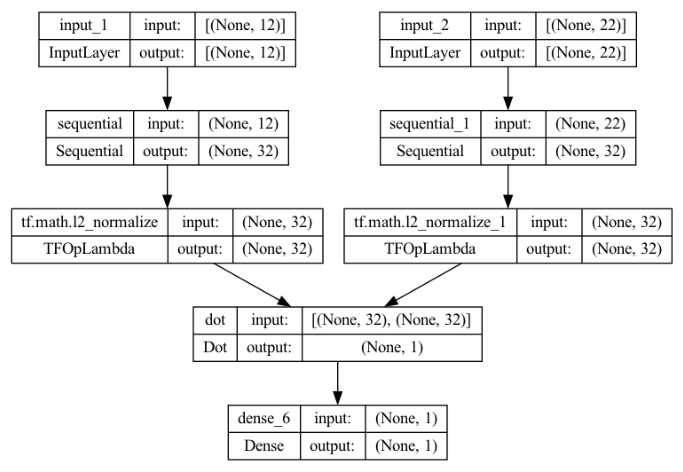

In [73]:
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

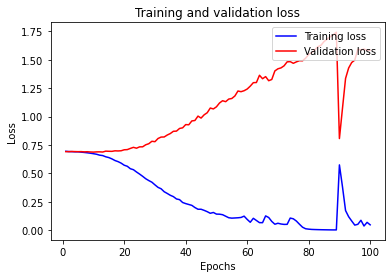

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot the training and validation loss over time
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
#plt.savefig('training_validation_loss.png', dpi=300, bbox_inches='tight')
plt.show()


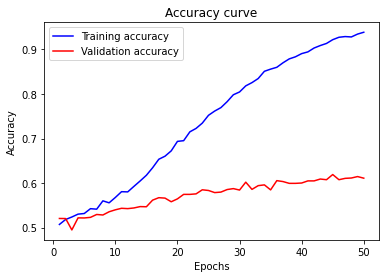

In [75]:
##accuracy curve

# Plot the training and validation accuracy over time
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


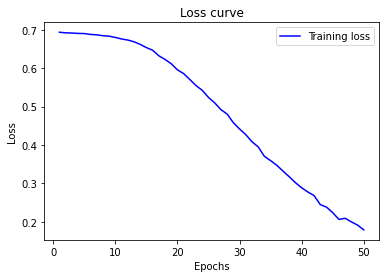

In [76]:

##the loss curve

# Plot the training and validation loss over time
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()

165/165 [==============================] - 0s 908us/step


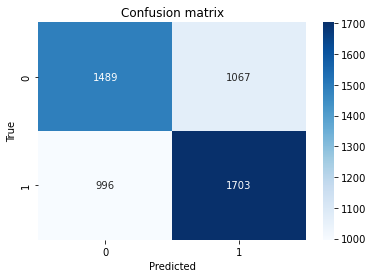

In [77]:


y_pred = model.predict([player_test, champion_test])
y_pred_binary = (y_pred >= 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



In the classification report, F1-score is a weighted average of precision and recall. It is a harmonic mean of precision and recall, with 1 as the best value and 0 as the worst value. The formula for calculating F1-score is:

F1-score = 2 * (precision * recall) / (precision + recall)

Support refers to the number of instances of each class in the actual data. It is the number of samples in the true positive (TP), false positive (FP), true negative (TN), and false negative (FN) categories, respectively.

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.60      0.58      0.59      2556
           1       0.61      0.63      0.62      2699

    accuracy                           0.61      5255
   macro avg       0.61      0.61      0.61      5255
weighted avg       0.61      0.61      0.61      5255



In [79]:
# Convert the predicted and actual classes to a pandas Series
y_pred_series = pd.Series(y_pred_binary.flatten(), name='Predicted')
y_test_series = pd.Series(np.array(y_test).flatten(), name='Actual')

# Create the confusion matrix using the pandas crosstab function
confusion_matrix = pd.crosstab(y_test_series, y_pred_series, margins=True)

print(confusion_matrix)



Predicted     0     1   All
Actual                     
0          1489  1067  2556
1           996  1703  2699
All        2485  2770  5255


In [80]:
# define the number of output units
num_outputs = 32

# create the player feature input and point to the player neural network
input_player = tf.keras.layers.Input(shape=(num_player_features,))
vu = tf.keras.layers.Dense(256, activation='relu')(input_player)
vu = tf.keras.layers.Dense(128, activation='relu')(vu)
vu = tf.keras.layers.Dense(num_outputs)(vu)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the champion feature input and point to the champion neural network
input_champion = tf.keras.layers.Input(shape=(num_champion_features,))
vm = tf.keras.layers.Dense(256, activation='relu')(input_champion)
vm = tf.keras.layers.Dense(128, activation='relu')(vm)
vm = tf.keras.layers.Dense(num_outputs)(vm)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)

# specify the inputs and output of the model
model2 = tf.keras.Model([input_player, input_champion], output)
model2.summary()

# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
tf.random.set_seed(1)
model2.fit([player_train, champion_train], y_train, epochs=50, verbose=1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 22)]         0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 256)          3328        ['input_3[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 256)          5888        ['input_4[0][0]']                
                                                                                            

Epoch 50/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9508


In [129]:
model.evaluate([player_test, champion_test], y_test)

165/165 [==============================] - 0s 1ms/step - loss: 1.6091 - accuracy: 0.6042


[1.6090574264526367, 0.604186475276947]

In [82]:
model2.evaluate([player_test, champion_test], y_test)

165/165 [==============================] - 0s 1ms/step - loss: 1.0778 - accuracy: 0.5983


[1.07782781124115, 0.5982873439788818]

In [83]:
# join champion table to player table 
LOL_data_copy['id'] = LOL_data_copy['champion']
LOL_data_copy = LOL_data_copy.merge(champion_df_copy, on='id', how='left')
#LOL_data.drop(columns=['id', 'id_encoded'], inplace=True)
#LOL_data_copy.to_csv('LOL_data_copy.csv', index=False)
LOL_data_copy.head()

,Index,champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner,Counters,Countered_by
0,0,Renekton,JarvanIV,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.75,0.0,0.00,69,4.15,2.75,0.665,Swain,KSante,MasterYi
1,1,JarvanIV,Renekton,Cassiopeia,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.70,6.5,0.45,64,3.40,2.50,0.658,Soraka,Kindred,MasterYi
2,2,Cassiopeia,Renekton,JarvanIV,Ezreal,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.50,8.0,0.80,53,3.00,1.50,0.647,Olaf,Vex,Malzahar
3,3,Ezreal,Renekton,JarvanIV,Cassiopeia,Ashe,Quinn,Nidalee,Viktor,Varus,...,0.65,8.5,1.00,60,2.50,2.50,0.625,Taric,Ziggs,Tristana
4,4,Ashe,Renekton,JarvanIV,Cassiopeia,Ezreal,Quinn,Nidalee,Viktor,Varus,...,0.55,7.0,0.65,59,2.95,3.33,0.658,Nilah,Yuumi,Rell


In [84]:
LOL_data_copy[["id","tags"]]

,id,tags
0,Renekton,"['Fighter', 'Tank']"
1,JarvanIV,"['Tank', 'Fighter']"
2,Cassiopeia,['Mage']
3,Ezreal,"['Marksman', 'Mage']"
4,Ashe,"['Marksman', 'Support']"
...,...,...
17510,Gragas,"['Fighter', 'Mage']"
17511,MonkeyKing,"['Fighter', 'Tank']"
17512,Fizz,"['Assassin', 'Fighter']"
17513,Xayah,['Marksman']


In [85]:
LOL_data_copy.tags.unique()
LOL_data_copy.to_csv('LOL_data_copy.csv', index=False)

In [86]:
##replicate to 162 rows for prediction
sample  = player_test.sample()
test = np.array(sample)
test.shape
test_match = np.repeat(test.reshape(1, -1), champion_encoded.shape[0], axis=0)

##take the test sample's index and retrieve its unscaled form
sample = LOL_data_copy.loc[sample.index[0]]
sample_df = pd.DataFrame(sample).transpose()
##amplify the one row to 162 rows
repeated_df = pd.concat([sample_df] * 162, ignore_index=True)

##cleaning the dataframe
columns_to_drop = ['id', 'difficulty', 'tags', 'hp', 'hpperlevel', 'mp', 'mpperlevel',   'movespeed', 'armor', 'armorperlevel', 'spellblock',   'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',                   'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',   'attackspeedperlevel', 'attackspeed', 'Best_Partner', 'Counters','Countered_by']
repeated_df = repeated_df.drop(columns=columns_to_drop)
repeated_df = repeated_df.rename(columns={'champion': 'test_champion'})


In [87]:
# champ_df supposed to be 162 champs
prediction = model.predict([test_match, champion_encoded.iloc[:, 1:23]]) 
prediction

6/6 [==============================] - 0s 1ms/step


array([[0.982766  ],
       [0.94806737],
       [0.9675719 ],
       [0.2687845 ],
       [0.8391948 ],
       [0.906686  ],
       [0.11836796],
       [0.95524544],
       [0.9089757 ],
       [0.91461694],
       [0.93756944],
       [0.942116  ],
       [0.28515476],
       [0.8859914 ],
       [0.9576641 ],
       [0.96761847],
       [0.9767466 ],
       [0.85012954],
       [0.89069664],
       [0.9301734 ],
       [0.9842135 ],
       [0.8647641 ],
       [0.97641224],
       [0.1704749 ],
       [0.93653035],
       [0.93116575],
       [0.26432312],
       [0.92739314],
       [0.9802971 ],
       [0.9568217 ],
       [0.8984431 ],
       [0.14812703],
       [0.7711366 ],
       [0.95423764],
       [0.9761388 ],
       [0.9523595 ],
       [0.9711808 ],
       [0.9343574 ],
       [0.97985435],
       [0.9335956 ],
       [0.96564114],
       [0.9240283 ],
       [0.94928706],
       [0.91862154],
       [0.98920524],
       [0.913422  ],
       [0.966306  ],
       [0.738

In [88]:
repeated_df

,Index,test_champion,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,...,teamPosition,tier,top_champs_overall,wins,losses,winPct,veteran,freshBlood,hotStreak,win
0,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
1,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
2,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
3,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
4,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
158,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
159,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False
160,1,Gragas,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,...,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",45.0,37.0,0.54878,False,True,False,False


In [89]:
# sort the results, highest prediction first
sorted_index = np.argsort(-prediction,axis=0).reshape(-1).tolist()  #negate to get largest rating first
## sorted  percentage of winning
sorted_ypu   = prediction[sorted_index]
##sorted champion list from highest winning to lowest winning
sorted_champion  = champion_encoded.loc[sorted_index]
sorted_champion['Winning Rate'] = sorted_ypu
sorted_champion = pd.concat([sorted_champion, sorted_champion.reset_index(drop=True)], axis=1)
sorted_champion = sorted_champion.loc[:,~sorted_champion.columns.duplicated()]

In [90]:
sorted_champion.head()

,id,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,...,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,Best_Partner_encoded,Counters_encoded,Countered_by_encoded,id_encoded,Winning Rate
126,Talon,0.7,0.867133,0.60,0.0377,0.425287,0.333333,0.433333,0.854545,1.000000,...,0.80,0.87500,0.62,0.483333,0.400000,155,83,53,126,0.992805
60,Khazix,0.6,0.814685,0.40,0.0327,0.459770,0.833333,0.633333,0.763636,0.588235,...,0.50,0.71875,0.62,0.450000,0.514667,107,47,47,60,0.992074
75,Maokai,0.3,0.786713,0.60,0.0375,0.494253,0.333333,0.733333,0.945455,0.588235,...,0.60,0.75000,0.66,0.354167,0.866667,140,114,54,75,0.990882
135,Udyr,0.7,0.888112,0.38,0.0271,0.574713,0.833333,0.566667,0.854545,0.588235,...,0.45,0.68750,0.80,0.500000,0.466667,120,104,42,135,0.990714
122,Sylas,0.5,0.576923,1.00,0.0310,0.804598,0.500000,0.333333,0.945455,0.588235,...,0.80,0.65625,0.60,0.583333,0.453333,147,106,55,122,0.990440


In [91]:
## all the available teamPositions
LOL_data_copy.teamPosition.unique()

array(['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY'], dtype=object)

In [92]:
# Merge the dataframes based on the common column
merged_df = pd.merge(sorted_champion, LOL_data_copy, left_on='id', right_on='champion')

# Add the desired columns from LOL_data_copy to sorted_champion
sorted_champion[['difficulty', 'tags', 'hp', 'hpperlevel', 'mp', 'mpperlevel',
                 'movespeed', 'armor', 'armorperlevel', 'spellblock',
                 'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',
                 'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',
                 'attackspeedperlevel', 'attackspeed', 'Best_Partner', 'Counters',
                 'Countered_by']] = merged_df[['difficulty_y', 'tags',
       'hp_y', 'hpperlevel_y', 'mp_y', 'mpperlevel_y', 'movespeed_y',
       'armor_y', 'armorperlevel_y', 'spellblock_y', 'spellblockperlevel_y',
       'attackrange_y', 'hpregen_y', 'hpregenperlevel_y', 'mpregen_y',
       'mpregenperlevel_y', 'attackdamage_y', 'attackdamageperlevel_y',
       'attackspeedperlevel_y', 'attackspeed_y', 'Best_Partner', 'Counters',
       'Countered_by']]
##Combine everything together and sort by winning rate
concatenated_df = pd.concat([repeated_df, sorted_champion], axis=1)
columns_to_drop = ['difficulty', 'hp', 'hpperlevel', 'mp', 'mpperlevel',  'movespeed', 'armor', 'armorperlevel', 'spellblock',  'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel',  'mpregen', 'mpregenperlevel', 'attackdamage', 'attackdamageperlevel',                   'attackspeedperlevel', 'attackspeed']
concatenated_df = concatenated_df.drop(columns=columns_to_drop)
new_column_order = ['id', 'Winning Rate', 'tags', 'Best_Partner', 'Counters', 'Countered_by',  'champion1', 'champion2', 'champion3', 'champion4', 'champion5',  'champion6', 'champion7', 'champion8', 'champion9', 'teamPosition',   'tier', 'top_champs_overall', 'winPct']
concatenated_df = concatenated_df[new_column_order]
concatenated_df = concatenated_df.sort_values(by='Winning Rate', ascending=False)

In [93]:
concatenated_df.head(13)

,id,Winning Rate,tags,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct
126,Talon,0.992805,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
60,Khazix,0.992074,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
75,Maokai,0.990882,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
135,Udyr,0.990714,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
122,Sylas,0.990440,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
111,Sett,0.990369,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
147,Warwick,0.990239,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
89,Olaf,0.989708,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
44,Ivern,0.989205,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
64,KSante,0.988762,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878


In [94]:
##Realizing that "tags" for the original dataset is inaccurate and limited
import requests
import pandas as pd

# Make a GET request to the Riot API to retrieve the champion data
url = 'http://ddragon.leagueoflegends.com/cdn/11.5.1/data/en_US/champion.json'
response = requests.get(url)
data = response.json()

# Create a DataFrame with the champion names and roles
champions = []
roles = []
for champion in sorted(data['data'].values(), key=lambda x: x['name']):
    champions.append(champion['name'])
    roles.append(', '.join(champion['tags']))
    
df = pd.DataFrame({'Champion': champions, 'Roles': roles})

# Print the DataFrame

#df.to_csv('df.csv', index=False)
print(df)


    Champion           Roles
0     Aatrox   Fighter, Tank
1       Ahri  Mage, Assassin
2      Akali        Assassin
3    Alistar   Tank, Support
4      Amumu      Tank, Mage
..       ...             ...
149      Zed        Assassin
150    Ziggs            Mage
151   Zilean   Support, Mage
152      Zoe   Mage, Support
153     Zyra   Mage, Support

[154 rows x 2 columns]


In [95]:
df.Roles.unique()

array(['Fighter, Tank', 'Mage, Assassin', 'Assassin', 'Tank, Support',
       'Tank, Mage', 'Mage, Support', 'Mage', 'Marksman',
       'Marksman, Support', 'Mage, Marksman', 'Support, Mage',
       'Tank, Fighter', 'Support, Tank', 'Fighter, Mage',
       'Assassin, Fighter', 'Mage, Fighter', 'Assassin, Mage',
       'Marksman, Mage', 'Fighter, Assassin', 'Fighter',
       'Fighter, Marksman', 'Fighter, Support', 'Support, Assassin',
       'Marksman, Assassin', 'Support', 'Tank', 'Support, Fighter'],
      dtype=object)

In [96]:
# Merge the DataFrames based on the 'Champion' column in df and the 'id' column in concatenated_df
merged_df = concatenated_df.merge(df, left_on='id', right_on='Champion', how='left')
merged_df = merged_df.drop(columns=['Champion'])

In [97]:
# Define a dictionary to map each champion ID to its role
champion_roles = {
    'Velkoz': 'Mage',
    'Chogath': 'Tank, Mage',
    'Nilah': 'Assassin, Mage',
    'KSante': 'Assassin',
    'Khazix': 'Assassin',
    'JarvanIV': 'Fighter, Tank',
    'RekSai': 'Fighter, Tank',
    'Kaisa': 'Marksman, Assassin',
    'Belveth': 'Fighter, Tank',
    'Leblanc': 'Assassin, Mage',
    'KogMaw': 'Marksman',
    'DrMundo': 'Fighter, Tank',
    'TwistedFate': 'Mage',
    'MissFortune': 'Marksman',
    'Zeri': 'Mage, Support',
    'Vex': 'Mage',
    'Akshan': 'Assassin, Marksman',
    'Gwen': 'Fighter',
    'LeeSin': 'Fighter',
    'Renata': 'Fighter, Tank',
    'Nunu': 'Tank, Mage',
    'MonkeyKing': 'Fighter',
    'MasterYi': 'Assassin',
    'XinZhao': 'Fighter, Assassin',
    'TahmKench': 'Tank, Support',
    'AurelionSol': 'Mage'
    
}

# Fill in the 'Roles' column based on the 'id' column
merged_df.loc[merged_df['id'].isin(champion_roles.keys()), 'Roles'] = merged_df['id'].map(champion_roles)


In [98]:
merged_df[merged_df['Roles']=="Assassin"]

,id,Winning Rate,tags,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct,Roles
0,Talon,0.992805,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
1,Khazix,0.992074,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
9,KSante,0.988762,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
33,Zed,0.974503,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
39,Akali,0.967572,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
89,Shaco,0.933004,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
113,MasterYi,0.904833,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin


In [99]:
unique_ids_with_nan_roles = merged_df[pd.isna(merged_df['Roles'])]['id'].unique()
print(unique_ids_with_nan_roles)


['Milio']


In [100]:
import pandas as pd



# Define the roles for each team position
roles = {
    'TOP': ['Mage, Support', 'Mage', "Mage, Fighter",'Mage, Assassin', 'Assassin, Mage', 'Marksman, Mage', 'Marksman, Assassin', 'Support'],
    'JUNGLE': ['Mage, Assassin', 'Tank, Support', 'Tank, Mage', 'Mage, Support', 'Mage', 'Marksman', 'Marksman, Support', 'Mage, Marksman', 'Support, Mage', 'Support, Tank', 'Marksman, Mage', 'Support, Assassin', 'Marksman, Assassin', 'Support', 'Tank', 'Support, Fighter'],
    'MIDDLE': ["Support, Mage",'Fighter, Tank', 'Tank, Support', 'Marksman', 'Marksman, Support', 'Mage, Marksman', 'Support, Mage', 'Support, Tank', 'Marksman, Mage', 'Support, Assassin', 'Marksman, Assassin', 'Support', 'Tank', 'Support, Fighter', 'Tank, Mage'],
    'BOTTOM': ['Fighter, Tank', 'Mage, Assassin', 'Assassin', 'Tank, Support', 'Support, Mage', 'Tank, Fighter', 'Support, Tank', 'Fighter, Mage', 'Fighter, Assassin', 'Fighter', 'Support', 'Tank', 'Support, Fighter', 'Assassin, Fighter', 'Mage, Fighter', 'Assassin, Mage', 'Fighter, Support', 'Support, Assassin', 'Tank, Mage', 'Mage, Support', 'Mage'],
    'UTILITY': ['Fighter, Tank', 'Mage, Assassin', 'Assassin', 'Tank, Mage', 'Mage', 'Marksman', 'Tank, Fighter', 'Fighter, Mage', 'Assassin, Fighter', 'Mage, Fighter', 'Assassin, Mage', 'Marksman, Mage', 'Mage, Marksman', 'Fighter, Assassin', 'Fighter', 'Fighter, Marksman', 'Marksman, Assassin']
}

# Initialize an empty DataFrame to store the sorted rows
sorted_df = pd.DataFrame()

# Iterate through team positions and roles
for position, role_list in roles.items():
    # Filter rows based on team position and role
    in_role = merged_df[(merged_df['teamPosition'] == position) & (merged_df['Roles'].isin(role_list))]
    not_in_role = merged_df[(merged_df['teamPosition'] == position) & (~merged_df['Roles'].isin(role_list))]
    
    # Sort the in_role rows by 'Winning Rate'
    sorted_rows = in_role.sort_values(by='Winning Rate', ascending=False)
    
    # Concatenate the sorted_rows and not_in_role DataFrames
    position_df = pd.concat([not_in_role, sorted_rows], ignore_index=True)
    
    # Append the position_df to the sorted_df DataFrame
    sorted_df = pd.concat([sorted_df, position_df], ignore_index=True)

# Reset the index of the sorted DataFrame
sorted_df.reset_index(drop=True, inplace=True)



In [101]:
##construct the final dataframe that takes in consideration of the roles of the champion needed 
sorted_df.drop(columns=['tags'], inplace=True)
sorted_df = sorted_df[['id', 'Winning Rate', 'Roles', 'Best_Partner', 'Counters', 'Countered_by', 'champion1', 'champion2', 'champion3', 'champion4', 'champion5', 'champion6', 'champion7', 'champion8', 'champion9', 'teamPosition', 'tier', 'top_champs_overall', 'winPct']]
sorted_df = sorted_df.rename(columns={'id': 'champion_rec'})


In [102]:
sorted_df.head(10)

,champion_rec,Winning Rate,Roles,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct
0,Talon,0.992805,Assassin,Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
1,Khazix,0.992074,Assassin,Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
2,Udyr,0.990714,"Fighter, Tank",Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
3,Sett,0.990369,"Fighter, Tank",Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
4,Warwick,0.990239,"Fighter, Tank",Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
5,Olaf,0.989708,"Fighter, Tank",Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
6,KSante,0.988762,Assassin,Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
7,Rammus,0.987591,"Tank, Fighter",Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
8,Aatrox,0.982766,"Fighter, Tank",Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878
9,Qiyana,0.982694,"Assassin, Fighter",Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878


In [103]:
merged_df

,id,Winning Rate,tags,Best_Partner,Counters,Countered_by,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9,teamPosition,tier,top_champs_overall,winPct,Roles
0,Talon,0.992805,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
1,Khazix,0.992074,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Assassin
2,Maokai,0.990882,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,"Tank, Mage"
3,Udyr,0.990714,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,"Fighter, Tank"
4,Sylas,0.990440,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,"Mage, Assassin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Kled,0.132734,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,"Fighter, Tank"
159,KogMaw,0.122188,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,Marksman
160,Anivia,0.118368,['Assassin'],Zac,Nautilus,Karma,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,"Mage, Support"
161,Urgot,0.117360,['Assassin'],Samira,Jax,Jax,Pantheon,Fiddlesticks,Twitch,Lulu,Talon,Shyvana,Gangplank,Draven,Janna,JUNGLE,DIAMOND,"['RekSai', 'Volibear', 'Gragas']",0.54878,"Fighter, Tank"
